# EDA

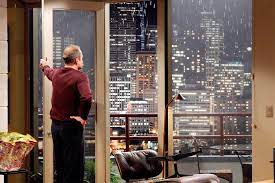

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("_select_kchd_kchs_date_kchs_price_from_king_county_house_details_202512091053.csv")

In [3]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


In [4]:
df.shape

(21597, 21)

In [13]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [7]:
df.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,...,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000
6,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,0.000,3,7,...,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000,2014-06-27,257500.000
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,...,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,...,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,...,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000


In [9]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [10]:
df['condition'].unique()

array([3, 5, 4, 1, 2])

In [11]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [12]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

In [19]:
df.dtypes

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
dtype: object

In [15]:
df['bedrooms'].unique()

array([ 3.,  2.,  4.,  5.,  1.,  6.,  7.,  8.,  9., 11., 10., 33.])

In [16]:
df = df.astype({'bedrooms': int})

In [20]:
df = df.astype({'sqft_living': int})

In [21]:
df = df.astype({'sqft_lot': int})

In [22]:
df = df.astype({'floors': int})

In [24]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [26]:
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [28]:
df = df.astype({'condition': int})

In [29]:
df = df.astype({'grade': int})

In [30]:
df = df.astype({'sqft_above': int})

In [32]:
df = df.astype({'yr_built': int})

In [34]:
df = df.astype({'zipcode': int})

In [35]:
df = df.astype({'lat': int})

In [36]:
df = df.astype({'long': int})

In [37]:
df = df.astype({'sqft_living15': int})

In [38]:
df = df.astype({'sqft_lot15': int})

In [40]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [41]:
df = df.astype({'price': int})

In [42]:
df.dtypes

id                        int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                       int64
long                      int64
sqft_living15             int64
sqft_lot15                int64
date             datetime64[ns]
price                     int64
dtype: object

In [43]:
import missingno as msno

<Axes: >

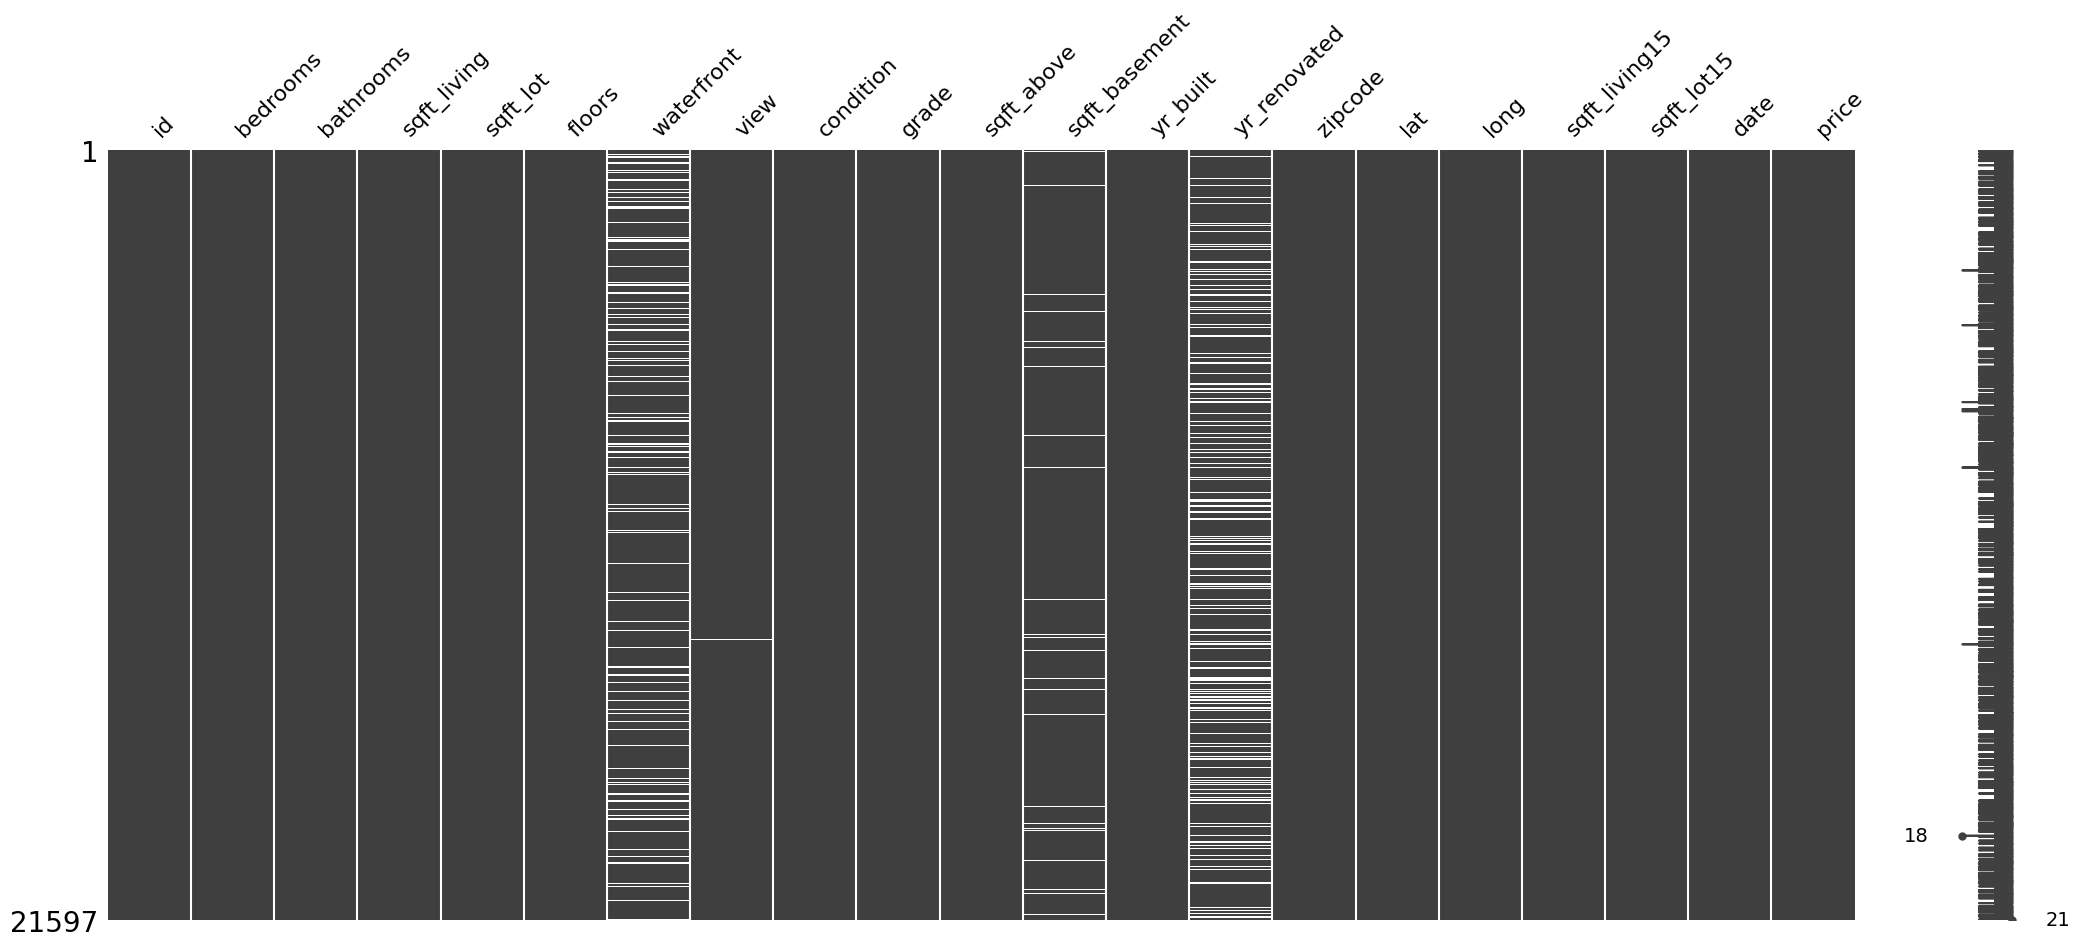

In [44]:
msno.matrix(df)

In [45]:
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_living'] - df['sqft_above'])

In [46]:
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [47]:
df['yr_renovated'].unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [48]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [49]:
df['yr_renovated'] = df.yr_renovated.apply(lambda x: x/10)

In [51]:
df = df.astype({'yr_renovated': int})

In [52]:
mode_value_waterfront = df['waterfront'].mode()
mode_value_waterfront

0   0.000
Name: waterfront, dtype: float64

In [53]:
mode_value_view = df['view'].mode()
mode_value_view

0   0.000
Name: view, dtype: float64

In [54]:
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)

In [59]:
df = df.astype({'waterfront': int})
df = df.astype({'view': int})
df = df.astype({'sqft_basement': int})

In [61]:
df.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

In [62]:
df.dtypes

id                        int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                       int64
long                      int64
sqft_living15             int64
sqft_lot15                int64
date             datetime64[ns]
price                     int64
dtype: object

<Axes: >

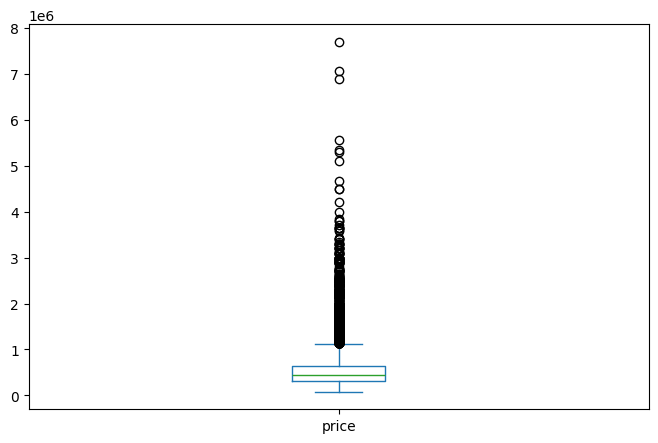

In [79]:
df['price'].plot.box()